In [53]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv('./data/field_goals.csv', index_col=0)
df['intercept'] = 1
df.head()

,good,dist,year,seasons,cold,altitude,humid,windy,away_game,postseason,iced,turf,precipitation,pressure,intercept
pid,,,,,,,,,,,,,,,
829284,1,38,2019,2,0,0,1,1,0,0,0,0,0,0,1
829704,1,34,2019,8,0,0,0,1,1,0,0,0,0,0,1
829916,1,28,2019,3,0,0,0,1,1,0,0,0,0,0,1
829945,1,37,2019,5,0,0,0,1,0,0,0,0,0,0,1
829954,1,25,2019,3,0,0,0,1,1,0,0,0,0,0,1


In [68]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('good', axis=1), df['good'], test_size=0.2, stratify=df['good'])

In [79]:
model = sm.Logit(y_train, x_train)
result = model.fit(method='bfgs')
print(result.summary())

         Current function value: 0.303109
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 41
                           Logit Regression Results                           
Dep. Variable:                   good   No. Observations:                   75
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            9
Date:                Fri, 07 Feb 2020   Pseudo R-squ.:                  0.3427
Time:                        14:45:28   Log-Likelihood:                -22.733
converged:                      False   LL-Null:                       -34.585
Covariance Type:            nonrobust   LLR p-value:                  0.004795
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
dist             -0.1341        nan        nan        nan         nan 

In [80]:
y_pred = result.predict(exog=x_test)
y_logits = -np.log((1/y_pred) -1)

In [81]:
loss = log_loss(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred>0.5)
print(loss, accuracy)

0.44719963177428074 0.7894736842105263


In [82]:
df_results = x_test.copy()
df_results['good'] = y_test
df_results['prob'] = y_pred
df_results['logits'] = y_logits
df_results

,dist,year,seasons,cold,altitude,humid,windy,away_game,postseason,iced,turf,precipitation,pressure,intercept,good,prob,logits
pid,,,,,,,,,,,,,,,,,
832120,33,2019,8,0,0,1,1,0,0,0,0,0,0,1,1,0.982464,4.025827
831407,31,2019,1,0,0,0,1,0,0,0,0,0,0,1,1,0.991609,4.772229
833494,38,2019,15,0,0,0,1,1,0,0,1,0,0,1,1,0.365557,-0.551326
832866,32,2019,5,0,0,0,0,1,0,0,1,0,0,1,1,0.905632,2.261427
833421,52,2019,8,0,0,0,1,0,0,0,1,0,0,1,0,0.375583,-0.508338
831990,54,2019,1,0,0,0,1,0,0,0,0,0,0,1,1,0.844011,1.688380
833912,40,2019,2,0,1,0,1,1,0,0,0,0,0,1,1,0.994535,5.203982
831474,25,2019,14,0,0,1,1,0,0,0,1,0,0,1,1,0.942681,2.800088
832135,21,2019,3,0,0,1,1,1,0,0,0,0,0,1,1,0.996707,5.712656


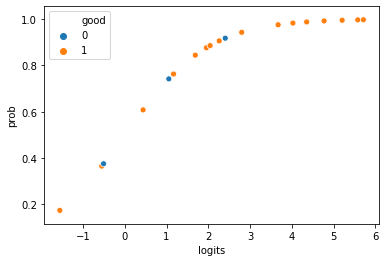

In [83]:
sns.scatterplot(x='logits', y='prob', data=df_results, hue='good')
